In [1]:
import pandas as pd
import numpy as np
import seaborn as sen

In [2]:
x1=np.append((np.random.random(500)*-3),(np.random.random(500)*3))
x2=np.append((np.random.random(500)*-3),(np.random.random(500)*3))

In [3]:
noise=np.random.randn(1000)
y=2*x1+3*x2+noise*0.5

In [4]:
data=pd.DataFrame({'x1':x1,'x2':x2,'y':y},columns=['x1','x2','y'])

In [5]:
x3=np.append((np.random.random(500)*-3),(np.random.random(500)*3))
x4=np.append((np.random.random(500)*-3),(np.random.random(500)*3))
y_actual=2*x1+3*x2+noise*0.5
datatest=pd.DataFrame({'x1':x3,'x2':x4,'y':y_actual},columns=['x1','x2','y'])

In [6]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
lr=LinearRegression()
rd=Ridge()
las=Lasso()

In [7]:
lr.fit(data[['x1','x2']],data[['y']])
rd.fit(data[['x1','x2']],data[['y']])
las.fit(data[['x1','x2']],data[['y']])

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [8]:
lr_out=lr.predict(datatest[['x1','x2']])
rd_out=rd.predict(datatest[['x1','x2']])
las_out=las.predict(datatest[['x1','x2']])

In [9]:
print("Linear Regression bias and cofe"+str(lr.coef_)+str(lr.intercept_))
print("Ridge Regression bias and cofe"+str(rd.coef_)+str(rd.intercept_))
print("Lasso Regression bias and cofe"+str(las.coef_)+str(las.intercept_))

Linear Regression bias and cofe[[2.00961819 3.00765657]][0.0008666]
Ridge Regression bias and cofe[[2.00982811 3.00639775]][0.00088021]
Lasso Regression bias and cofe[1.83273377 2.7769973 ][0.00912136]


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

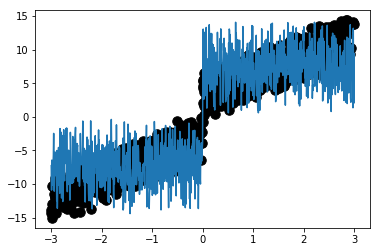

In [13]:
plt.scatter(x2,y_actual,color='black',s=90)
plt.plot(np.linspace(x2.min(),x2.max(),1000),lr_out)
plt.show()

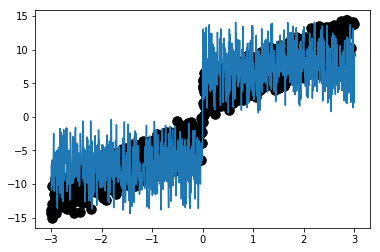

In [14]:
plt.scatter(x2,y_actual,color='black',s=90)
plt.plot(np.linspace(x2.min(),x2.max(),1000),rd_out)
plt.show()

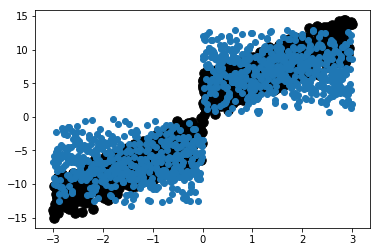

In [16]:
plt.scatter(x2,y_actual,color='black',s=90)
plt.scatter(np.linspace(x2.min(),x2.max(),1000),las_out)
plt.show()

In [139]:
# The mean squared error
print("Linear Regression Mean squared error: %.2f" % np.mean((lr.predict(datatest[['x1','x2']]) - lr_out) ** 2))
# Explained variance score: 1 is perfect prediction
print('Linear Regression Variance score: %.2f' % lr.score(datatest[['x1','x2']], lr_out))

Mean squared error: 0.00
Variance score: 1.00


In [143]:
# The mean squared error
print("Ridge Regression Mean squared error: %.2f" % np.mean((rd.predict(datatest[['x1','x2']]) - rd_out) ** 2))
# Explained variance score: 1 is perfect prediction
print('Ridge Regression Variance score: %.2f' % rd.score(datatest[['x1','x2']], rd_out))

Ridge Regression Mean squared error: 0.00
Ridge Regression Variance score: 1.00


In [142]:
# The mean squared error
print("Lasso Regression Mean squared error: %.2f" % np.mean((las.predict(datatest[['x1','x2']]) - las_out) ** 2))
# Explained variance score: 1 is perfect prediction
print('Lasso Regression Variance score: %.2f' % las.score(datatest[['x1','x2']], las_out))

Lasso Regression Mean squared error: 0.00
Lasso Regression Variance score: 1.00


In [153]:
min_x=np.min(datatest['x1'])
max_x=np.max(datatest['x1'])
x_range=np.linspace(min_x,max_x,1000)

In [17]:
plt.plot(x_range,y_actual,color='black')
plt.scatter(datatest['x1'],datatest['y'],color='red')

NameError: name 'x_range' is not defined

In [158]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [186]:
y_actual.shape
#lr.score(y_actual,lr_out)

(1000,)

In [187]:
lr_out.shape

(1000, 1)

In [199]:
print('Linear Regression mean square errors =    '+str(mean_squared_error(y_actual,lr_out)))
print('Ridge Regression mean square errors =    '+str(mean_squared_error(y_actual,rd_out)))
print('Lasso Regression mean square errors =    '+str(mean_squared_error(y_actual,las_out)))

Linear Regression mean square errors =    20.15195522919632
Ridge Regression mean square errors =    20.146913282965322
Lasso Regression mean square errors =    19.047454712587157


In [200]:
print('Linear Regression mean absolute errors =    '+str(mean_absolute_error(y_actual,lr_out)))
print('Ridge Regression mean absolute errors =    '+str(mean_absolute_error(y_actual,rd_out)))
print('Lasso Regression mean absolute errors =    '+str(mean_absolute_error(y_actual,las_out)))

Linear Regression mean absolute errors =    3.613930955971904
Ridge Regression mean absolute errors =    3.613474528915547
Lasso Regression mean absolute errors =    3.5235863497045856
